In [1]:
import ddlpy
import datetime as dt
import os
import matplotlib.pyplot as plt
plt.close("all")
import xarray as xr
import os
from concurrent.futures import ProcessPoolExecutor
import glob
from mpl_toolkits.basemap import Basemap
from pyproj import Transformer


In [2]:
# get the dataframe with locations and their available parameters
locations = ddlpy.locations()

In [29]:
print(locations['Naam'].unique().tolist())

locations_sorted = locations.sort_values(by='Naam', ascending=True)
print(locations_sorted['Naam'].unique().tolist())

targets = ['north cormorant', 'Platform F16-A', 'K13 Alpha', 'Platform Hoorn Q1-A','Ijmuiden munitiestortplaats', 'Euro platform', 'Platform D15-A']

locations_filtered = locations[
    locations['Naam'].str.lower().isin([name.lower() for name in targets])
]
print(locations_filtered['Naam'].unique().tolist())

print(locations_filtered.index.tolist())

['West-Terschelling', 'K13 Alpha', 'Eurogeul DWE', 'Westereems Oost boei', 'Kier 2M WP11 -8mWS', 'Hansweert wind', 'Oost Meep', 'Gulden Aa', 'Platform D15-A', 'Sluis 4 Spuien', 'Krammersluizen laagbekken', 'Hoek van Holland benoorden de Noorderdam (Dk1)', 'Roermond boven', 'Vooroever Vlietsingel Poel', 'Petten meetraai 67', 'Noordwijk aan Zee Boulevard', 'Hoek van Holland', "Tull En 'T Waal West", 'Texel Westgat', 'Zaltbommel', 'Brakel (Andelse Maas)', 'Westzaan (kilometer 13)', 'Veere havenmond', 'West Meep west', 'Eemmeerdijk, kilometer 21', 'De Blocq van Kuffeler Hoge Vaart', 'Harderhaven buiten', 'Nijkerk', 'Middelburg draaibrug', 'Den Oever spuisluizen', 'Buitenhaven 7', 'Heerewaarden ontzanding (recreatieplas)', 'Wilhelminakanaal, sluis I spuikanaal', 'Kallosluis schelde', 'Hollandse kust zuid (deelgebied)', 'Buitenhuizen', 'Groote Gat noord', 'Delfzijl', 'Roompot buiten', 'Pannengat boei 1', 'Euro platform', 'Amelander zeegat boei 62', 'Oosterschelde 4', 'Marknesse', 'Westereems

In [ ]:
import ddlpy

locations = ddlpy.locations()

bool_grootheid = locations['Grootheid.Omschrijving'].str.contains('golf')

selected = locations.loc[bool_grootheid]

# print(selected[['Naam', 'Grootheid.Code', 'Grootheid.Omschrijving']])

get_locations_measuring_Hm0 = locations[locations['Grootheid.Code'].str.contains('Hm0')]
print(get_locations_measuring_Hm0[['Naam', 'Grootheid.Code', 'Grootheid.Omschrijving']])

Empty DataFrame
Columns: [Naam, Grootheid.Code, Grootheid.Omschrijving]
Index: []


In [30]:
def get_data(location, start_date, end_date, dir_output, overwrite=True):
    
    station_id = location.name
    station_messageid = location["Locatie_MessageID"]
    filename = os.path.join(dir_output, f"{station_id}-{station_messageid}.nc")
    
    if os.path.isfile(filename) and overwrite is False:
        print('{station_id}: netcdf file already exists and overwrite=False, skipping')
        return
    
    measurements = ddlpy.measurements(location, start_date=start_date, end_date=end_date)
    
    if measurements.empty:
        print(f'{station_id}: no measurements found')
        return

    print(f'{station_id}: writing retrieved data to netcdf file')
    
    # simplyfy dataframe (drop constant columns and add these properties as attributes)
    simplified = ddlpy.simplify_dataframe(measurements)
    # dropping timezone is required to get proper encoding in time variable (in netcdf file)
    simplified.index = simplified.index.tz_convert(None)
    
    # convert to xarray
    ds = simplified.to_xarray()
    ds = ds.assign_attrs(simplified.attrs)
    
    # write to netcdf file. NETCDF3_CLASSIC or NETCDF4_CLASSIC automatically converts 
    # variables of dtype <U to |S which saves a lot of disk space
    ds.to_netcdf(filename, format="NETCDF4_CLASSIC")

In [31]:
main_path = r'C:\Users\User\OneDrive\Documents\Python\PYTHON_MSC_CE\Year_2\Python_Thesis\cht_hurrywave\examples\DanielTest\01_data\Waterinfo_RWS'
output_path = os.path.join(main_path, 'Sinterklaas_NorthSea_Nobnd')

In [33]:
# Sinterklaas storm 01/12/2013 to 08/12/2013

start_date = dt.datetime(2013, 12, 1)  # Year, Month, Day
end_date = dt.datetime(2013, 12, 8)  # Year, Month, Day

for _, loc in locations_filtered.iterrows():
    get_data(loc, start_date, end_date, output_path) 




100%|██████████| 1/1 [00:00<00:00,  6.32it/s]


K13: no measurements found


100%|██████████| 1/1 [00:00<00:00,  7.68it/s]


K13: no measurements found


100%|██████████| 1/1 [00:00<00:00,  7.64it/s]


K13: no measurements found


100%|██████████| 1/1 [00:00<00:00,  7.06it/s]


K13: no measurements found


100%|██████████| 1/1 [00:00<00:00,  2.12it/s]


D15: writing retrieved data to netcdf file


100%|██████████| 1/1 [00:00<00:00,  7.05it/s]


EURPFM: no measurements found


100%|██████████| 1/1 [00:00<00:00,  1.71it/s]

EURPFM: writing retrieved data to netcdf file


PermissionError: [Errno 13] Permission denied: 'C:\\Users\\User\\OneDrive\\Documents\\Python\\PYTHON_MSC_CE\\Year_2\\Python_Thesis\\cht_hurrywave\\examples\\DanielTest\\01_data\\Waterinfo_RWS\\Sinterklaas_NorthSea_Nobnd\\EURPFM-10946.nc'

[2, 0, 7, 10, 16, 29, 9]
['Euro platform' 'Platform D15-A' 'Platform Hoorn Q1-A' 'North Cormorant'
 'K13 Alpha' 'Platform F16-A' 'IJmuiden munitiestortplaats']
3.2750367795089743 51.997798948307036
2.9357499999999868 54.32566666666657
4.150285753428388 52.925352690598444
1.1660989999996711 61.33818799999954
3.2189319999999912 53.21700999999997
4.012222222222268 54.11666666666666
4.056983069497795 52.54921398592231


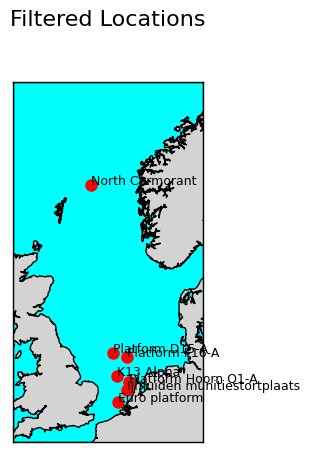

In [11]:
locations_x  = locations_filtered['X'].values
locations_y  = locations_filtered['Y'].values
locations_names = locations_filtered['Naam'].values

unique_locations = {name: [] for name in set(locations_names)}
for idx, name in enumerate(locations_names):
    unique_locations[name].append(idx)

first_indices_temp = {name: indices[0] for name, indices in unique_locations.items()}

first_indices_temp = list(first_indices_temp.values())
print(first_indices_temp)

locations_x = locations_x[first_indices_temp]
locations_y = locations_y[first_indices_temp]
locations_names = locations_names[first_indices_temp]

transformer = Transformer.from_crs("EPSG:25831", "EPSG:4326", always_xy=True)
locations_x, locations_y = transformer.transform(locations_x, locations_y)

print(locations_names)
fig = plt.figure(figsize=(12, 24))
fig.suptitle('Filtered Locations', fontsize=16)
# Add a map subplot at the top
map_ax = fig.add_axes([0.1, 0.8, 0.8, 0.15])  # Adjusted position for the map
m = Basemap(projection='merc', llcrnrlat=50, urcrnrlat=65, llcrnrlon=-5, urcrnrlon=10, resolution='i', ax=map_ax)
m.drawcoastlines()
m.fillcontinents(color='lightgray', lake_color='aqua')
m.drawmapboundary(fill_color='aqua')

# Add labels for each location
for i, name in enumerate(locations_names):
    # Convert coordinates to map projection
    # Convert coordinates from EPSG:25831 (Amersfoort / RD New) to EPSG:4326 (WGS 84)


    print(locations_x[i], locations_y[i])
    x, y = m(locations_x[i], locations_y[i])
    m.plot(x, y, 'ro', markersize=8)
    plt.text(x, y, name, fontsize=9, ha='left', color='black')

plt.show()

In [28]:
file = os.path.join(output_path, 'EURPFM-10946.nc')

ds = xr.open_dataset(file)
# print(ds)

# print(list(ds.data_vars))

print(ds['Meetwaarde.Waarde_Alfanumeriek'].values)

print(locations_filtered['Hoedanigheid.Omschrijving'])


['laagwater' 'hoogwater' 'laagwater' 'hoogwater' 'laagwater' 'hoogwater'
 'laagwater' 'hoogwater' 'laagwater' 'hoogwater' 'laagwater' 'hoogwater'
 'laagwater' 'hoogwater' 'laagwater' 'hoogwater' 'laagwater' 'hoogwater'
 'laagwater' 'hoogwater' 'laagwater' 'hoogwater' 'laagwater' 'hoogwater'
 'laagwater' 'hoogwater' 'laagwater']
Code
D15                           niet van toepassing
EURPFM                      t.o.v. Mean Sea Level
EURPFM        golffrequentie tussen 30 en 500 mHz
EURPFM             t.o.v. Normaal Amsterdams Peil
Q1            golffrequentie tussen 30 en 100 mHz
                             ...                 
NC1                           niet van toepassing
NORTHCMRT                     niet van toepassing
NC1                           niet van toepassing
NORTHCMRT    golffrequentie tussen 30 en 1000 mHz
K13                           niet van toepassing
Name: Hoedanigheid.Omschrijving, Length: 156, dtype: object


100%|██████████| 1/1 [00:00<00:00,  1.03it/s]

Data was found in Waterbase


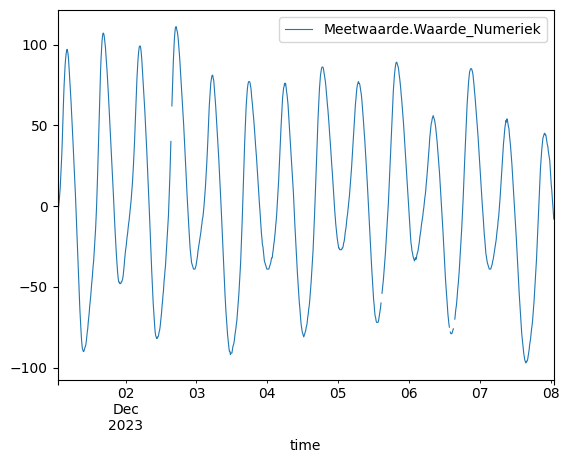

In [ ]:
import ddlpy
import datetime as dt

# get the dataframe with locations and their available parameters
locations = ddlpy.locations()

#select a set of parameters 
# Filter the locations dataframe with the desired parameters and stations.
bool_stations = locations.index.isin(locations_filtered.index.to_list())
# measured (WATHTE) versus computed/astro
bool_grootheid = locations['Grootheid.Code'].isin(['WATHTE'])
# timeseries (NVT) versus extremes
bool_groepering = locations['Groepering.Code'].isin(['NVT'])
# vertical reference (NAP/MSL)
bool_hoedanigheid = locations['Hoedanigheid.Code'].isin([''])
selected = locations.loc[bool_stations & bool_grootheid & 
                         bool_groepering & bool_hoedanigheid]

start_date = dt.datetime(2023, 12, 1)
end_date = dt.datetime(2023, 12, 8)

# provide a single row of the locations dataframe to ddlpy.measurements
measurements = ddlpy.measurements(selected.iloc[0], start_date=start_date, end_date=end_date)

if not measurements.empty:
    print('Data was found in Waterbase')
    measurements.plot(y="Meetwaarde.Waarde_Numeriek", linewidth=0.8)
else:
    print('No Data!')